# **Exercise**  
  
#### Try to Plot the data points of given dataset on  a scatter plot chart to see if linear regression model can be applied. if yes, then build a model that can answer following questions:  
  
#### **1.** Predict price of a Mercedez Benz that is 4 years old with mileage 45000  
  
#### **2.** Predict price of a BMW X5 that is 7 years old with mileage 86000  
  
#### **3.** Find out the accuracy score of model

## **DataSet**  
  
| Car Model | Mileage | Sell Price($) | Age(yrs) |
|------------|----------|---------------|-----------|
| BMW X5     | 69000    | 18000         | 6         |
| BMW X5     | 35000    | 34000         | 3         |
| BMW X5     | 57000    | 26100         | 5         |
| BMW X5     | 22500    | 40000         | 2         |
| BMW X5     | 46000    | 31500         | 4         |
| Audi A5    | 59000    | 29400         | 5         |
| Audi A5    | 52000    | 32000         | 5         |
| Audi A5    | 72000    | 19300         | 6         |
| Audi A5    | 91000    | 12000         | 8         |
| Mercedez   | 67000    | 22000         | 6         |
| Mercedez   | 83000    | 20000         | 7         |
| Mercedez   | 79000    | 21000         | 7         |
| Mercedez   | 59000    | 33000         | 4         |


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings("ignore")

> First we have to see if the data is linear by plotting it on scatter graph

In [3]:
df = pd.read_csv("resources/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


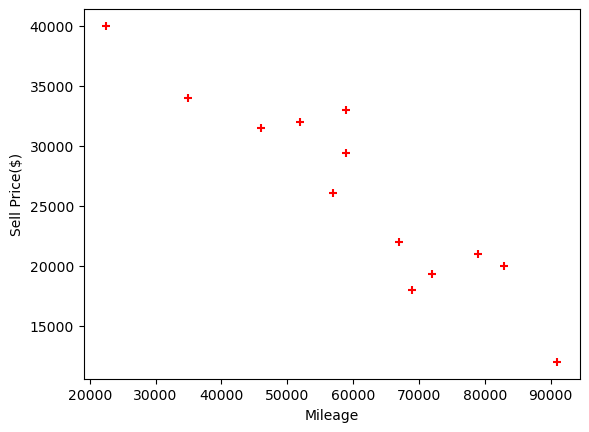

In [13]:
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df['Mileage'],df['Sell Price($)'], c="red", marker='+')



> The Dataset is linear

> Now let's build the model, but first we have to get rid of the test data

## Using pandas _get_dummies_

In [15]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [17]:
merged = pd.concat([df,dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [18]:
final = merged.drop(['Car Model', 'Mercedez Benz C class'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True
5,59000,29400,5,True,False
6,52000,32000,5,True,False
7,72000,19300,6,True,False
8,91000,12000,8,True,False
9,67000,22000,6,False,False


In [20]:
model = LinearRegression()

In [22]:
X = final.drop(['Sell Price($)'], axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,False,True
1,35000,3,False,True
2,57000,5,False,True
3,22500,2,False,True
4,46000,4,False,True
5,59000,5,True,False
6,52000,5,True,False
7,72000,6,True,False
8,91000,8,True,False
9,67000,6,False,False


In [23]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [24]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Let's Predict the price of a Mercedez Benz that is 4 years old with mileage 45000

In [26]:
model.predict([[45000,4,False,False]])

array([36991.31721061])

### Let's Predict the price of a BMW X5 that is 7 years old with mileage 86000

In [27]:
model.predict([[86000,7,False,True]])

array([11080.74313219])

## Using sklearn _OneHotEncoder_

In [28]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


> Let's do label encoding of "Car Model" column

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
le = LabelEncoder()

In [30]:
labeled_df = df
labeled_df['Car Model'] = le.fit_transform(labeled_df['Car Model'])
labeled_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [32]:
X = labeled_df[['Car Model','Mileage', 'Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [33]:
y = labeled_df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe = ColumnTransformer(
    transformers = [
        ('encoder', OneHotEncoder(),[0])
    ],
    remainder = 'passthrough'
)

In [36]:
X = ohe.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [37]:
X = X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [38]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Let's Predict the price of a Mercedez Benz that is 4 years old with mileage 45000

In [39]:
model.predict([[0,1,45000,4]])

array([36991.31721062])

### Let's Predict the price of a BMW X5 that is 7 years old with mileage 86000

In [40]:
model.predict([[1,0,86000,7]])

array([11080.74313219])

In [41]:
model.score(X,y)

0.9417050937281083